In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Warning message:
“replacing previous import ‘dplyr::rename’ by ‘reshape::rename’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘class::condense’ by ‘reshape::condense’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”
Warning message:
“replacing previous import ‘TSPred::evaluate’ by ‘daltoolbox::evaluate’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[5]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,0.00,FALSE
2,0.25,FALSE
3,0.50,FALSE
4,0.75,FALSE
5,1.00,FALSE
6,1.25,FALSE


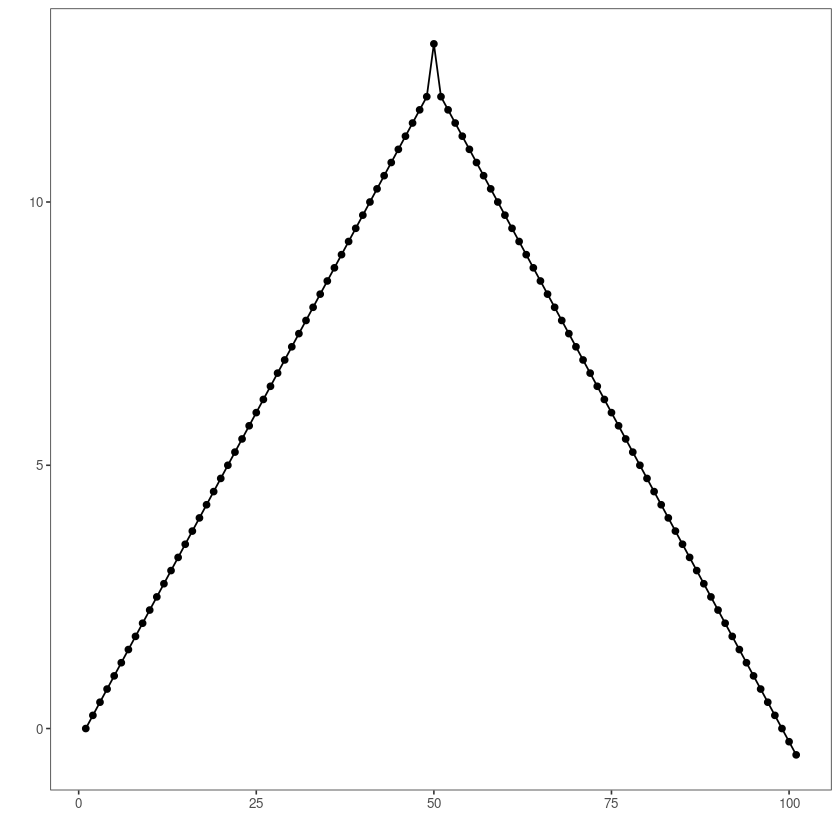

In [4]:
#ploting serie #1
ts_plot(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change point method 
  model <- hcp_scp(sw=30)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using hanr_fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event    type
1   43  TRUE hcp_scp
2   44  TRUE hcp_scp
3   45  TRUE hcp_scp
4   46  TRUE hcp_scp
5   47  TRUE hcp_scp
6   48  TRUE hcp_scp
7   49  TRUE hcp_scp
8   50  TRUE hcp_scp
9   51  TRUE hcp_scp
10  52  TRUE hcp_scp
11  53  TRUE hcp_scp
12  54  TRUE hcp_scp
13  55  TRUE hcp_scp
14  56  TRUE hcp_scp


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     13   
FALSE     0     87   


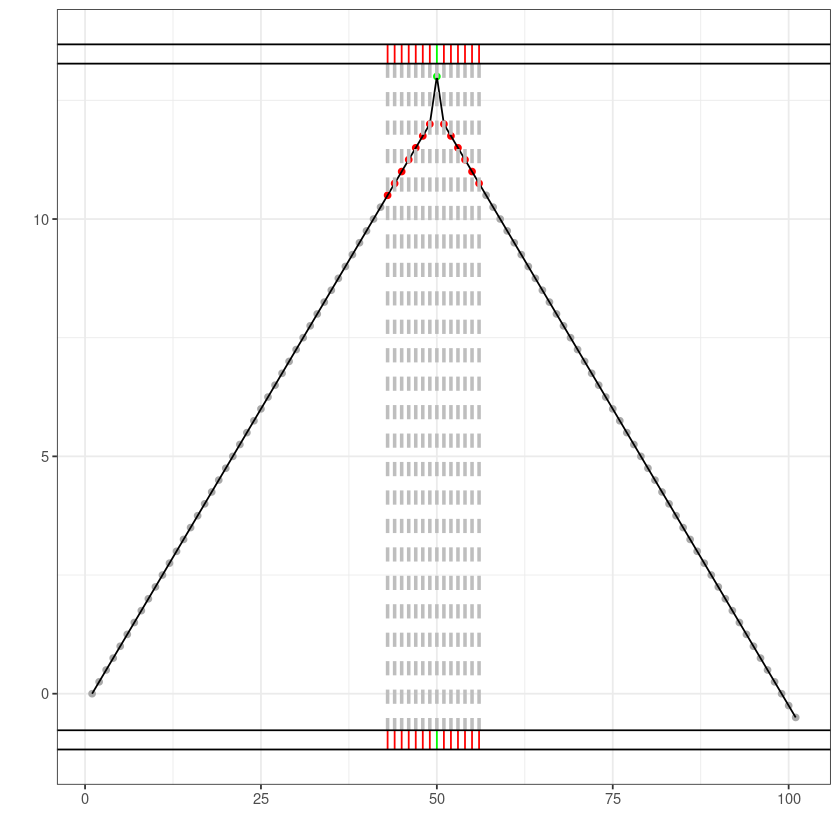

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)